# Association Rules Assignment- Q1
### Q. Prepare rules for the all the data sets 
1. Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2. Change the minimum length in apriori algorithm
3. Visulize the obtained rules using different plots 


In [1]:
#Importing the required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#!pip install mlxtend

In [3]:
# Reading the data
data = pd.read_csv('book.csv')
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
# No of rows and columns
data.shape

(2000, 11)

In [5]:
# Underlying iformation of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
ChildBks     2000 non-null int64
YouthBks     2000 non-null int64
CookBks      2000 non-null int64
DoItYBks     2000 non-null int64
RefBks       2000 non-null int64
ArtBks       2000 non-null int64
GeogBks      2000 non-null int64
ItalCook     2000 non-null int64
ItalAtlas    2000 non-null int64
ItalArt      2000 non-null int64
Florence     2000 non-null int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
# No data transformation/ pre-processing is required as the data is already in the trasactions format

## Applying APRIORI Algorithm

### 1. Creating Association rules with 10% Support and 70% confidence

In [7]:
# Support 10%
frequent_sets = apriori(data,min_support = 0.1, use_colnames= True)
frequent_sets['length'] = frequent_sets['itemsets'].apply(lambda x : len(x))
frequent_sets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [8]:
# Confidence- 70%
rules = association_rules(frequent_sets, min_threshold=0.7)
rules[rules.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
5,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
6,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
7,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
8,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
9,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534


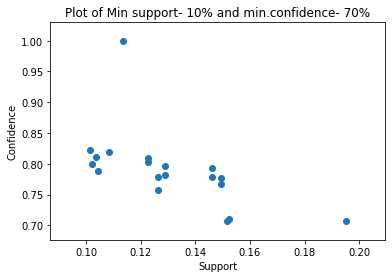

In [9]:
# visualization
plt.scatter('support','confidence', data= rules)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 10% and min.confidence- 70%')
plt.show()

### 2. Creating Association rules with 5% Support and 50% confidence

In [10]:
# Support 5%
frequent_sets_1 = apriori(data, min_support = 0.05, use_colnames= True)
frequent_sets_1['length'] = frequent_sets_1['itemsets'].apply(lambda x : len(x))
frequent_sets_1

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)",4
96,0.0560,"(ArtBks, YouthBks, GeogBks, CookBks)",4
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)",4
98,0.0510,"(GeogBks, DoItYBks, YouthBks, CookBks, ChildBks)",5


In [11]:
# Confidence- 50%
rules_1 = association_rules(frequent_sets_1, min_threshold=0.5)
rules_1[rules_1.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
255,"(ArtBks, GeogBks, CookBks)","(DoItYBks, ChildBks)",0.1035,0.1840,0.0535,0.516908,2.809284,0.034456,1.689120
256,"(ArtBks, GeogBks, ChildBks)","(DoItYBks, CookBks)",0.1020,0.1875,0.0535,0.524510,2.797386,0.034375,1.708763
257,"(DoItYBks, GeogBks, ChildBks)","(ArtBks, CookBks)",0.1045,0.1670,0.0535,0.511962,3.065639,0.036048,1.706833
258,"(DoItYBks, ArtBks, CookBks)","(GeogBks, ChildBks)",0.1015,0.1950,0.0535,0.527094,2.703044,0.033708,1.702240


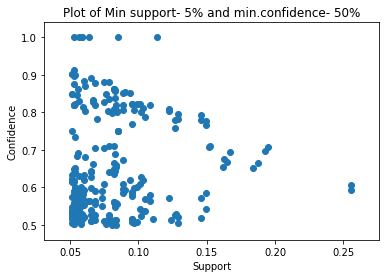

In [12]:
# visualization
plt.scatter('support','confidence', data= rules_1)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 5% and min.confidence- 50%')
plt.show()

### 3. Creating Association rules with 20% Support and 55% confidence

In [13]:
# Support 20%
frequent_sets_2 = apriori(data,min_support = 0.2, use_colnames= True)
frequent_sets_2['length'] = frequent_sets_2['itemsets'].apply(lambda x : len(x))
frequent_sets_2

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [14]:
# Confidence- 55%
rules_2 = association_rules(frequent_sets_2, min_threshold=0.55)
rules_2[rules_2.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


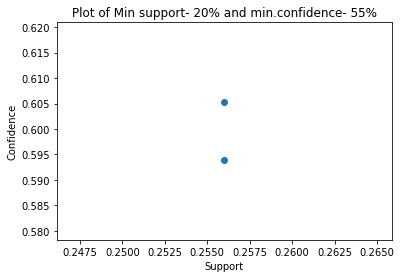

In [15]:
# visualization
plt.scatter('support','confidence', data= rules_2)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 20% and min.confidence- 55%')
plt.show()